<a href="https://colab.research.google.com/github/adihend/data-analytics/blob/main/FuelDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import Library Python
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#@title Import Data Mentah Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#@title Import Data CSV
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FuelConsumption (1).csv")
data.head(5)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


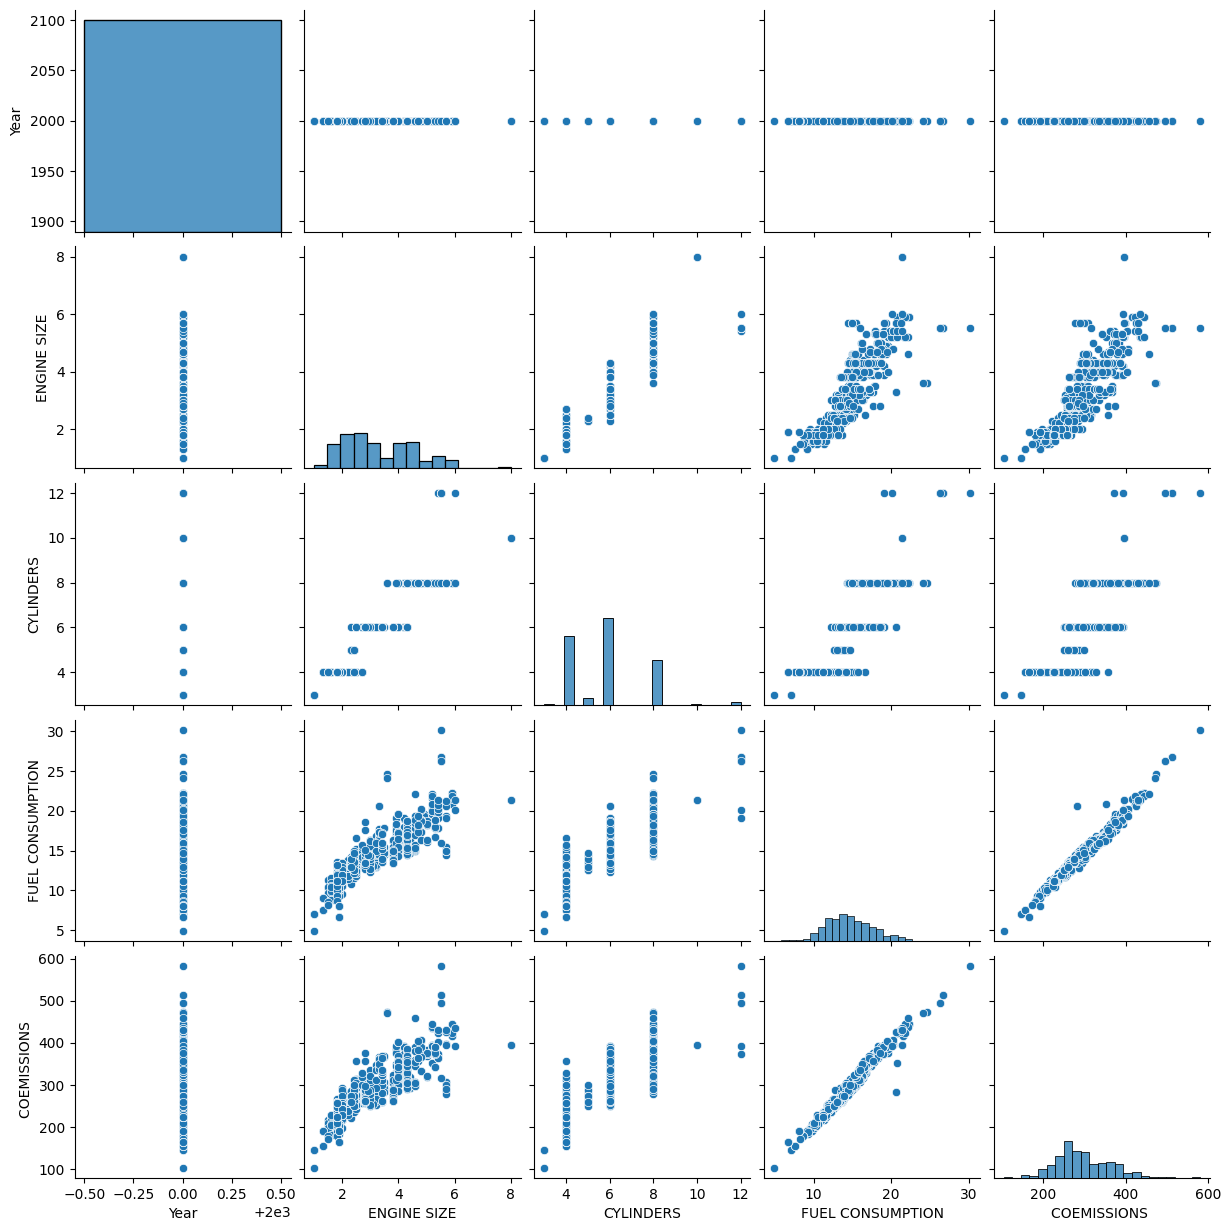

In [8]:
#@title Plot Kategori Setiap Variabel
sns.pairplot(data)

In [10]:
#@title Menghitung Missing Value
data.isnull().sum()

,0
Year,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
COEMISSIONS,0


In [15]:
#@title Mengambil Data Numerik
num_data = data.select_dtypes(include=np.number)
num_data.head(5)

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,2000,1.6,4,10.5,216
1,2000,1.6,4,9.8,205
2,2000,3.2,6,13.7,265
3,2000,3.5,6,15.0,301
4,2000,1.8,4,11.4,230


In [17]:
#@title Menghitung Outlier
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#@title Membuat Sebaran Outlier ke Diagram
(num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))

Year                 0.0
ENGINE SIZE          2.1
CYLINDERS            2.0
FUEL CONSUMPTION     4.1
COEMISSIONS         90.0
dtype: float64


,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
634,False,False,False,False,False
635,False,False,False,False,False
636,False,False,False,False,False
637,False,False,False,False,False


[2.30542342 7.18472991]


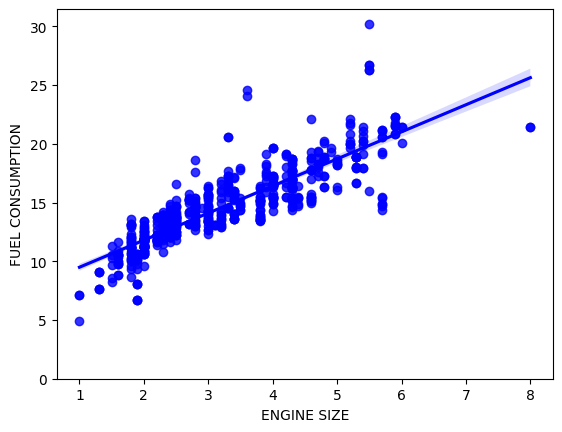

In [47]:
#@title Plot Linearitas
sns.regplot(x="ENGINE SIZE", y="FUEL CONSUMPTION", data=data, color="blue")
plt.ylim(0,)
# Hitung nilai linearitas
print(np.polyfit(data['ENGINE SIZE'], data['FUEL CONSUMPTION'], 1))

<Axes: >

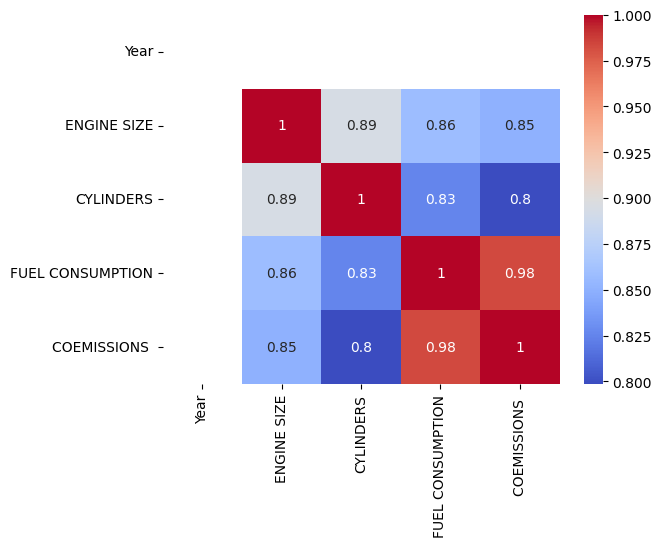

In [33]:
#@title Plot Heatmap
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')


In [25]:
#@title Hitung Nilai R-Square
from sklearn.metrics import r2_score
r2_score(data['ENGINE SIZE'], data['FUEL CONSUMPTION'])

-89.2237343355256

In [26]:
#@title Membagi Data Train dan Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data.drop(columns="FUEL CONSUMPTION"), num_data["FUEL CONSUMPTION"], test_size=0.2, random_state=42)

In [27]:
#@title Membangun Model Regresi Linier
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
#@title Melakukan Test
y_pred = model.predict(X_test)
y_pred


array([13.55284683, 17.8308649 , 14.5059134 , 24.85454377, 14.10552451,
       13.41078206, 14.48512635, 15.34780143, 20.59805792, 16.53497113,
       10.98961588, 11.8582264 , 15.53588538, 11.07823568, 12.45429692,
       10.1786765 , 13.46422704, 12.36567713,  9.86182661, 11.41512744,
       14.05784309, 17.69125459, 15.96316863, 12.09736329, 16.28418227,
       21.20503523, 21.20503523, 11.56141837,  9.03998045, 14.48335465,
       15.54850144, 13.8647878 , 19.07399646, 17.17535154, 15.41557176,
       11.29978516, 13.33552351, 18.50464843, 12.25701547, 11.86490702,
       14.48335465,  9.89522972, 28.70950475, 12.62908205, 19.45022678,
       12.66248516, 15.44903729, 17.97292967, 15.11705444, 12.42089381,
       14.10552451, 12.33227402, 15.68565729, 14.19499894, 15.36041749,
       20.24351633, 18.63260678, 11.93348495, 25.6521219 , 19.69849875,
       18.77050781, 17.33254926, 17.57414061, 11.00297713, 15.71237978,
       16.15622393, 11.69857422, 13.70759008, 15.1036932 , 13.37

In [40]:
#@title Menghitung Outlier Hasil Prediksi
Q1 = np.quantile(y_pred, 0.25)
Q3 = np.quantile(y_pred, 0.75)
IQR = Q3 - Q1
print(IQR)

4.9492847230259205


In [45]:
#@title Hapus Outlier
y_pred = y_pred[(y_pred > (Q1 - 1.5 * IQR)) & (y_pred < (Q3 + 1.5 * IQR))]
y_pred

array([13.55284683, 17.8308649 , 14.5059134 , 24.85454377, 14.10552451,
       13.41078206, 14.48512635, 15.34780143, 20.59805792, 16.53497113,
       10.98961588, 11.8582264 , 15.53588538, 11.07823568, 12.45429692,
       10.1786765 , 13.46422704, 12.36567713,  9.86182661, 11.41512744,
       14.05784309, 17.69125459, 15.96316863, 12.09736329, 16.28418227,
       21.20503523, 21.20503523, 11.56141837,  9.03998045, 14.48335465,
       15.54850144, 13.8647878 , 19.07399646, 17.17535154, 15.41557176,
       11.29978516, 13.33552351, 18.50464843, 12.25701547, 11.86490702,
       14.48335465,  9.89522972, 12.62908205, 19.45022678, 12.66248516,
       15.44903729, 17.97292967, 15.11705444, 12.42089381, 14.10552451,
       12.33227402, 15.68565729, 14.19499894, 15.36041749, 20.24351633,
       18.63260678, 11.93348495, 19.69849875, 18.77050781, 17.33254926,
       17.57414061, 11.00297713, 15.71237978, 16.15622393, 11.69857422,
       13.70759008, 15.1036932 , 13.37737894, 10.98961588, 19.41